<a href="https://colab.research.google.com/github/hungry4therock/Colab/blob/main/4_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_mnist_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
"""
내용: 텐서플로 mnist 실습하기
"""
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image
from google.colab import drive
tf.__version__

'2.5.0'

In [13]:
# 학습데이터 불러오기
(mnist_train_data, mnist_train_label), (mnist_test_data, mnist_test_label) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [14]:
# 데이터 확인
print(mnist_train_data.shape, mnist_train_label.shape)
print(mnist_test_data.shape, mnist_test_label.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


[19191 23871 15783 59288 50475]


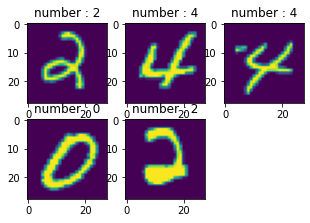

In [16]:
# 샘플이미지 출력
random_idx = np.random.randint(60000, size=5)
print(random_idx)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  label = mnist_train_label[idx]
  plt.imshow(mnist_train_data[idx, :])
  plt.title('number : %d' % label)

In [17]:
# 학습을 위한 데이터 전처리(정규화)
mnist_train_data = mnist_train_data / 255
mnist_test_data = mnist_test_data / 255
# 라벨 원핫코딩
mnist_train_label = to_categorical(mnist_train_label)
mnist_test_label = to_categorical(mnist_test_label)

In [18]:
# 학습모델 설계
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 학습모델 설정
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [20]:
# 학습하기
model.fit(mnist_train_data, mnist_train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - acc: 0.9146
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1374 - acc: 0.9593
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1019 - acc: 0.9697
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0806 - acc: 0.9747
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0668 - acc: 0.9793
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0559 - acc: 0.9822
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0483 - acc: 0.9844
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0424 - acc: 0.9863
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0355 - acc: 0.9885
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0335 - acc: 0.9890


In [21]:
# 평가하기
model.evaluate(mnist_test_data, mnist_test_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.1084 - acc: 0.9722


[0.10843465477228165, 0.9721999764442444]

In [22]:
# 테스트하기
result = model.predict(mnist_test_data)
score = accuracy_score(result.round(), mnist_test_label)
print('score :', score)

for i in range(10):
  print('------------------------------------------')
  print('결과 :', result[i].round())
  print('정답 :', mnist_test_label[i])

score : 0.9711
------------------------------------------
결과 : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
정답 : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
------------------------------------------
결과 : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
정답 : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
------------------------------------------
결과 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
정답 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
------------------------------------------
결과 : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
정답 : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
------------------------------------------
결과 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
정답 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
------------------------------------------
결과 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
정답 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
------------------------------------------
결과 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
정답 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
------------------------------------------
결과 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
정답 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
------------------------------------------
결과 : [

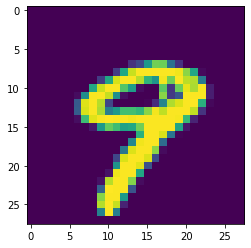

In [23]:
# 이미지 출력
plt.imshow(mnist_test_data[9].reshape(28, 28))